# Models

MutinomialNB with TfidVectorizer

- cleaned: accuracy - 0.65

- cleaned and stemmed: accuracy - 0.69

- cleaned and lemmized: accuracy - 0.70

MutinomialNB with CountVectorizer

- cleaned: accuracy - 0.80 (Live Model)

- cleaned and stemmed: accuracy - 0.56

- cleaned and lemmized: accuracy - 0.80

Test with Live Model:
- cleaned and dropped label: accuracy - 0.83 (Best Model)

In [1]:
# Import File Based Libraries
import pickle

# Import Data Wrangling Libraries
import pandas as pd
import numpy as np 
import re

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Machine Learning Libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# Import NLP Libraries
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
#split up data with train and test 
train_df = pd.read_csv("data/training.csv")
test_df = pd.read_csv("data/test.csv")

train_df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [3]:
#find nulls
display(train_df.isnull().sum())
display(test_df.isnull().sum())

#find dups
display(train_df.duplicated().sum())
display(test_df.duplicated().sum())


text     0
label    0
dtype: int64

text     0
label    0
dtype: int64

1

0

<AxesSubplot:xlabel='label', ylabel='count'>

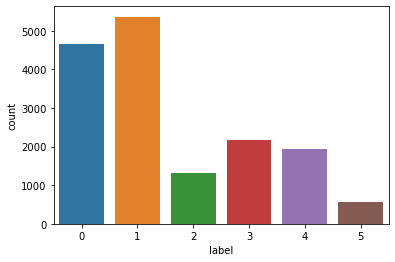

In [4]:
#label distribution for train split
sns.countplot(x=train_df['label'])

<AxesSubplot:xlabel='label', ylabel='count'>

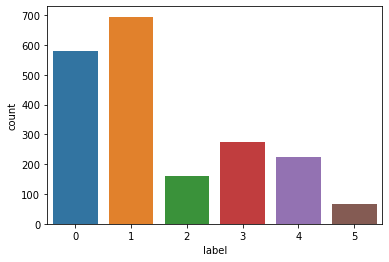

In [5]:
#label distribution for test split
sns.countplot(x=test_df['label'])

In [7]:
#helper function
def clean_tweets_without_nlp(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'[^\w\s]', '', tweet)
    words = word_tokenize(tweet)
    tweet = " ".join([ word for word in words])
    return tweet

def clean_tweets_with_stem(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'[^\w\s]', '', tweet)
    words = word_tokenize(tweet)
    tweet = " ".join([word for word in words if word not in stopwords.words('english') ])
    words = word_tokenize(tweet)
    porter = PorterStemmer()
    tweet = " ".join([ porter.stem(word) for word in words])
    return tweet

def clean_tweets_with_lem(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'[^\w\s]', '', tweet)
    words = word_tokenize(tweet)
    tweet = " ".join([word for word in words if word not in stopwords.words('english') ])
    words = word_tokenize(tweet)
    lem = WordNetLemmatizer()
    tweet = " ".join([ lem.lemmatize(word) for word in words])
    return tweet

#apply helper function
train_df['cleaned_text'] = train_df['text'].apply(clean_tweets_without_nlp)
test_df['cleaned_text'] = test_df['text'].apply(clean_tweets_without_nlp)

train_df['cleaned_text_stem'] = train_df['text'].apply(clean_tweets_with_stem)
test_df['cleaned_text_stem'] = test_df['text'].apply(clean_tweets_with_stem)

train_df['cleaned_text_lem'] = train_df['text'].apply(clean_tweets_with_lem)
test_df['cleaned_text_lem'] = test_df['text'].apply(clean_tweets_with_lem)




C:\Users\vicwu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


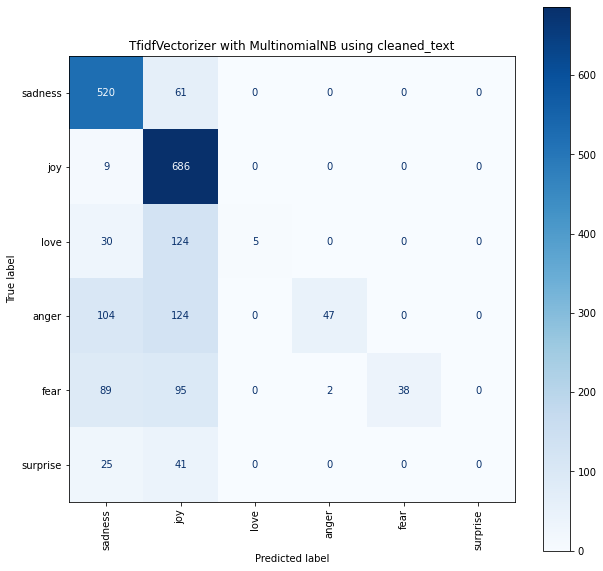

C:\Users\vicwu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vicwu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vicwu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.67      0.90      0.77       581
           1       0.61      0.99      0.75       695
           2       1.00      0.03      0.06       159
           3       0.96      0.17      0.29       275
           4       1.00      0.17      0.29       224
           5       0.00      0.00      0.00        66

    accuracy                           0.65      2000
   macro avg       0.71      0.38      0.36      2000
weighted avg       0.73      0.65      0.56      2000



C:\Users\vicwu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


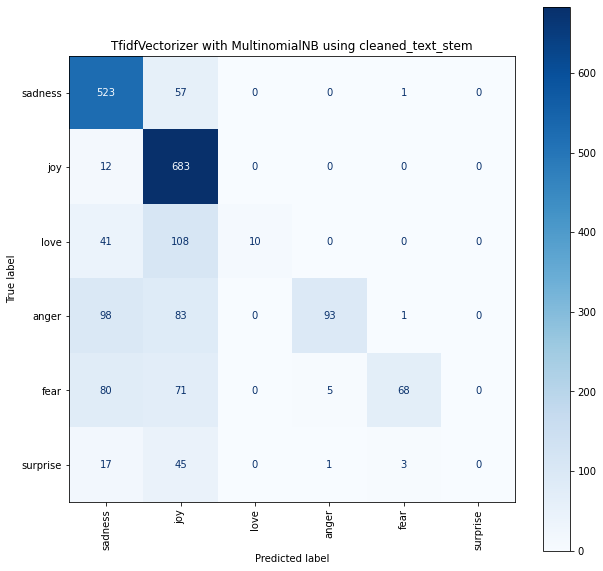

C:\Users\vicwu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vicwu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vicwu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.68      0.90      0.77       581
           1       0.65      0.98      0.78       695
           2       1.00      0.06      0.12       159
           3       0.94      0.34      0.50       275
           4       0.93      0.30      0.46       224
           5       0.00      0.00      0.00        66

    accuracy                           0.69      2000
   macro avg       0.70      0.43      0.44      2000
weighted avg       0.74      0.69      0.63      2000



C:\Users\vicwu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


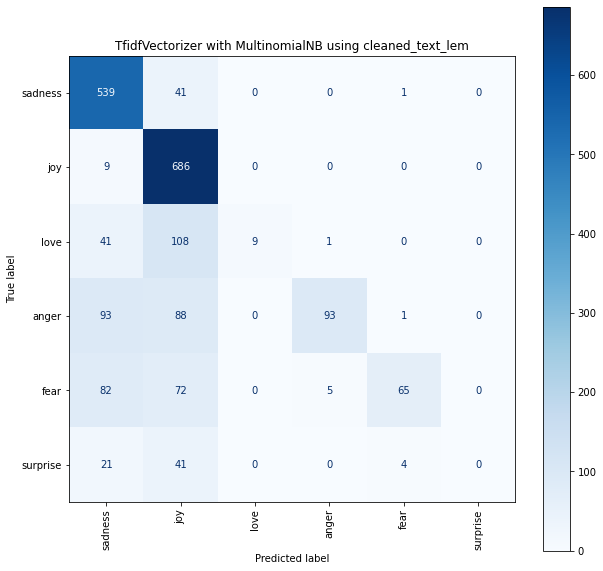

              precision    recall  f1-score   support

           0       0.69      0.93      0.79       581
           1       0.66      0.99      0.79       695
           2       1.00      0.06      0.11       159
           3       0.94      0.34      0.50       275
           4       0.92      0.29      0.44       224
           5       0.00      0.00      0.00        66

    accuracy                           0.70      2000
   macro avg       0.70      0.43      0.44      2000
weighted avg       0.74      0.70      0.63      2000



C:\Users\vicwu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vicwu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vicwu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
# Tfid Vectorized MNB Model

tfid_models = []

for col in train_df.columns[2:]:

    #split features and label
    X_train = train_df[col]
    y_train = train_df['label']

    X_test = test_df[col]
    y_test = test_df['label']

    #Fit and Transform
    X_temp = pd.concat([X_train,X_test])
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vectorizer.fit(X_temp)

    X_train = tfidf_vectorizer.transform(X_train)
    X_test = tfidf_vectorizer.transform(X_test)

    #Create model and predict
    model = MultinomialNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Create confusion matrix for Tfid model
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(model, X_test, y_test, display_labels=['sadness','joy','love','anger','fear','surprise'], cmap=plt.cm.Blues, ax=ax)
    plt.xticks(rotation=90)
    plt.title(f'TfidfVectorizer with MultinomialNB using {col}')
    plt.show()

    # display metrics
    # metrics_df = {
    #     'precision_score' : precision_score(y_test, y_pred, average=None),
    #     'recall_score' : recall_score(y_test, y_pred, average=None),
    #     'f1_score' : f1_score(y_test, y_pred, average=None)
    # }

    # display(pd.DataFrame(metrics_df, index=['sadness','joy','love','anger','fear','surprise']))

    print(classification_report(y_test, model.predict(X_test)))

    package = [model, tfidf_vectorizer]
    tfid_models.append(model)

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


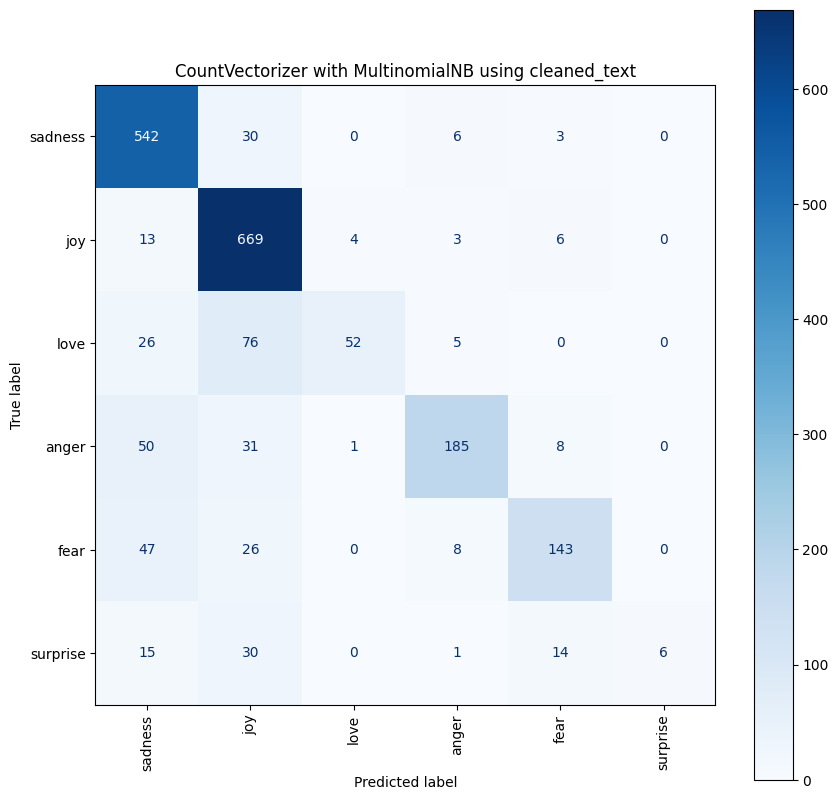

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       581
           1       0.78      0.96      0.86       695
           2       0.91      0.33      0.48       159
           3       0.89      0.67      0.77       275
           4       0.82      0.64      0.72       224
           5       1.00      0.09      0.17        66

    accuracy                           0.80      2000
   macro avg       0.86      0.60      0.64      2000
weighted avg       0.82      0.80      0.78      2000



/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


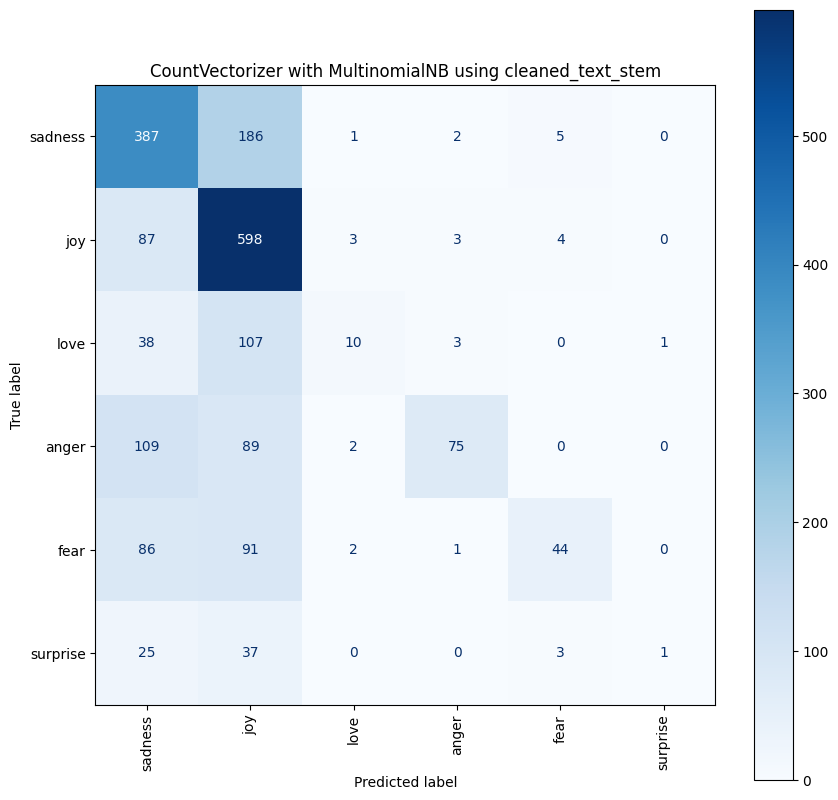

              precision    recall  f1-score   support

           0       0.53      0.67      0.59       581
           1       0.54      0.86      0.66       695
           2       0.56      0.06      0.11       159
           3       0.89      0.27      0.42       275
           4       0.79      0.20      0.31       224
           5       0.50      0.02      0.03        66

    accuracy                           0.56      2000
   macro avg       0.63      0.35      0.35      2000
weighted avg       0.61      0.56      0.50      2000



/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


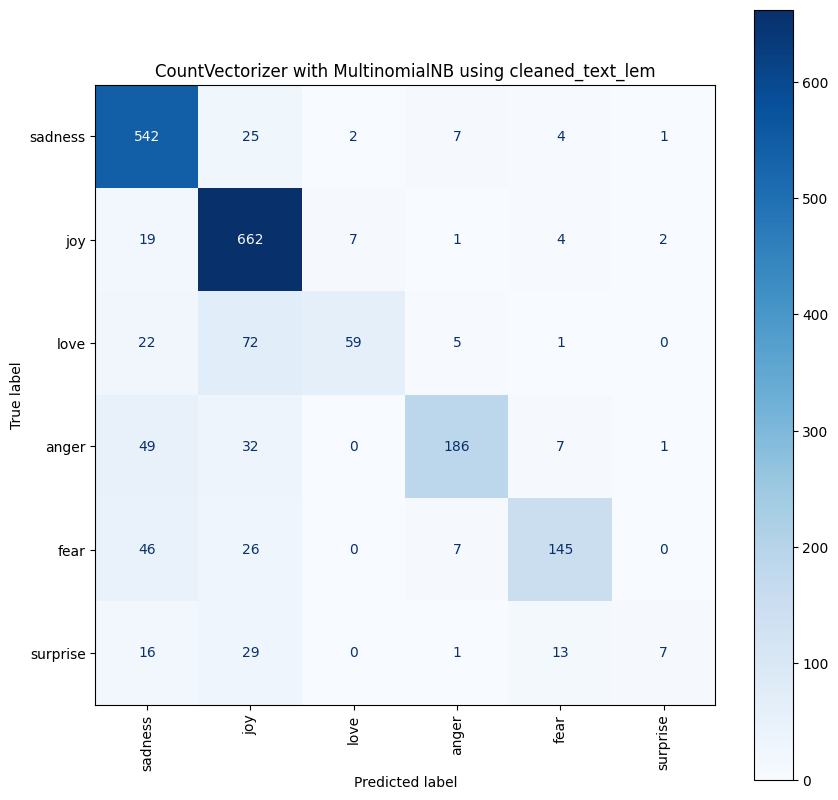

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       581
           1       0.78      0.95      0.86       695
           2       0.87      0.37      0.52       159
           3       0.90      0.68      0.77       275
           4       0.83      0.65      0.73       224
           5       0.64      0.11      0.18        66

    accuracy                           0.80      2000
   macro avg       0.80      0.61      0.65      2000
weighted avg       0.81      0.80      0.78      2000



In [8]:
#Bag of Words with MultinomialNB Model

BoW_models = []

for col in train_df.columns[2:]:

    #split features and label
    X_train = train_df[col]
    y_train = train_df['label']

    X_test = test_df[col]
    y_test = test_df['label']

    #Fit and Transform
    BoW_vectorizer = CountVectorizer()
    BoW_vectorizer.fit(X_temp)

    X_train = BoW_vectorizer.transform(X_train)
    X_test = BoW_vectorizer.transform(X_test)

    #Create model and predict
    model = MultinomialNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Create confusion matrix for BOW model
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(model, X_test, y_test, display_labels=['sadness','joy','love','anger','fear','surprise'], cmap=plt.cm.Blues, ax=ax)
    plt.xticks(rotation=90)
    plt.title(f'CountVectorizer with MultinomialNB using {col}')
    plt.show()

    #display metrics
    print(classification_report(y_test, model.predict(X_test)))

    package = [model, BoW_vectorizer]
    BoW_models.append(package)

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


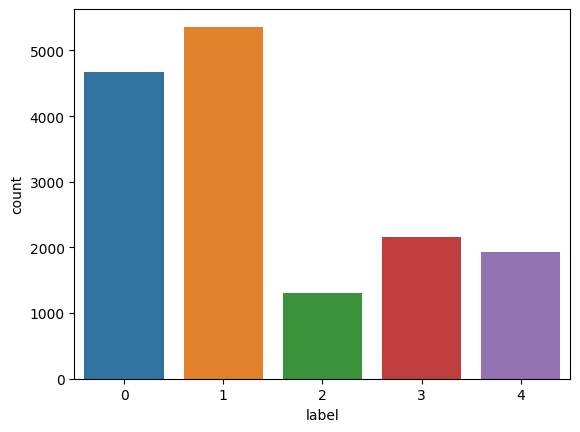

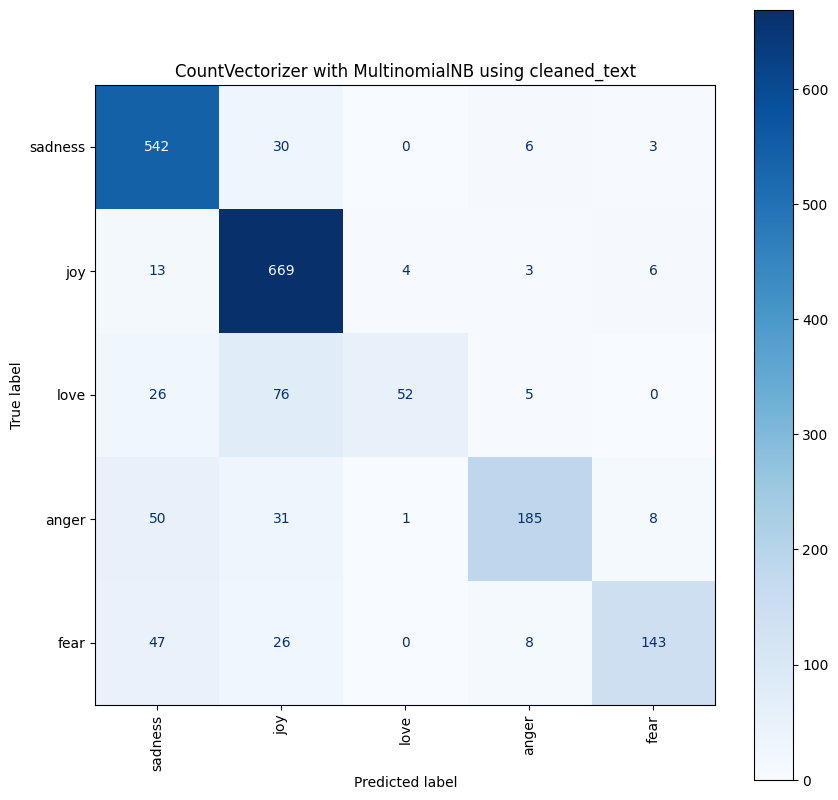

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       581
           1       0.80      0.96      0.88       695
           2       0.91      0.33      0.48       159
           3       0.89      0.67      0.77       275
           4       0.89      0.64      0.74       224

    accuracy                           0.82      1934
   macro avg       0.86      0.71      0.75      1934
weighted avg       0.83      0.82      0.81      1934



/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


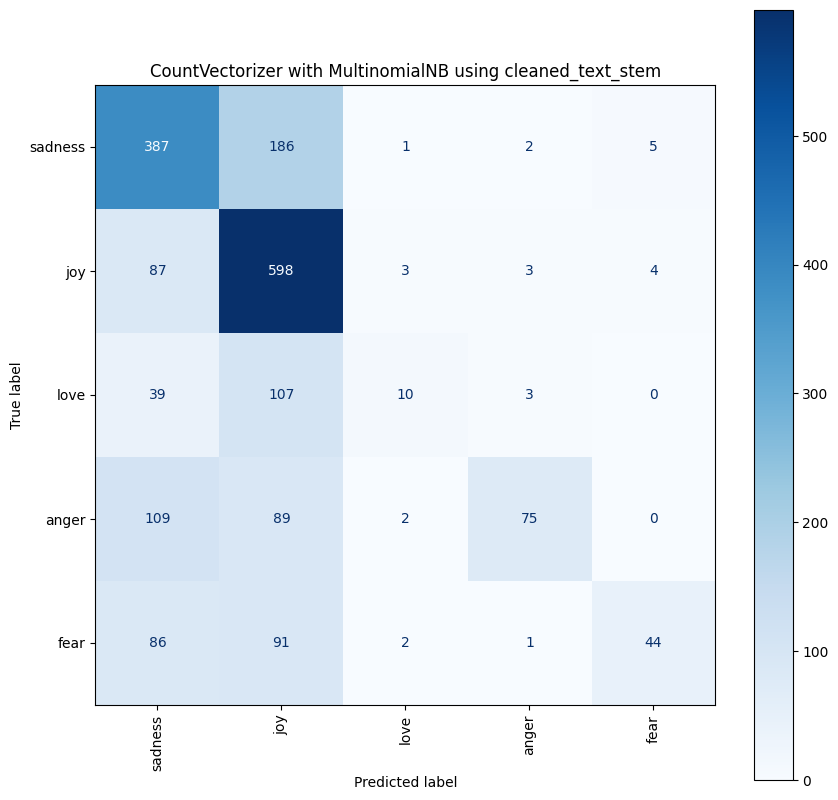

              precision    recall  f1-score   support

           0       0.55      0.67      0.60       581
           1       0.56      0.86      0.68       695
           2       0.56      0.06      0.11       159
           3       0.89      0.27      0.42       275
           4       0.83      0.20      0.32       224

    accuracy                           0.58      1934
   macro avg       0.68      0.41      0.43      1934
weighted avg       0.63      0.58      0.53      1934



/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


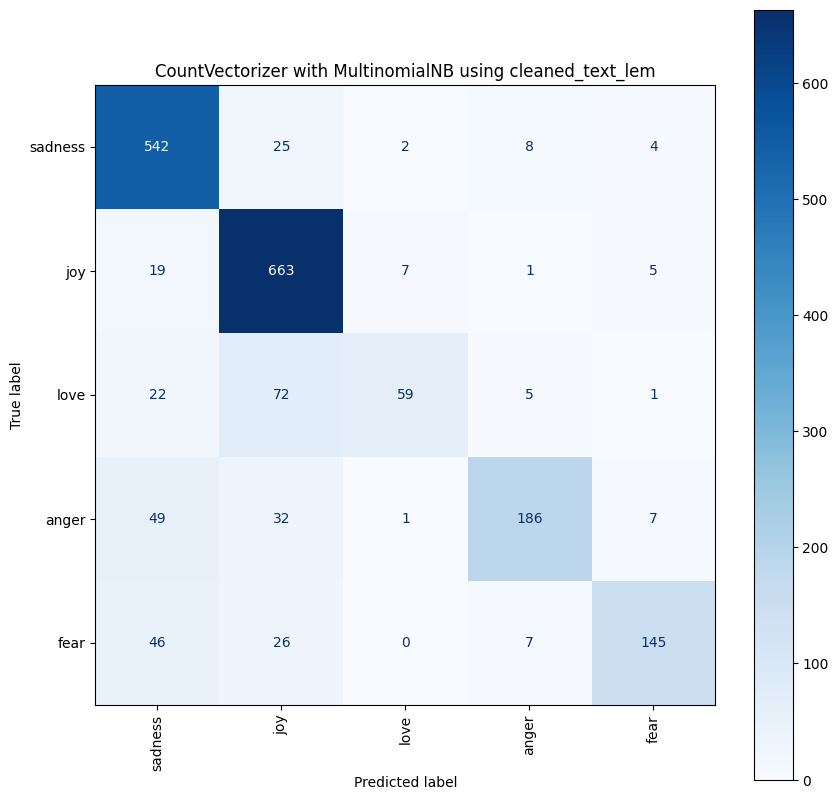

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       581
           1       0.81      0.95      0.88       695
           2       0.86      0.37      0.52       159
           3       0.90      0.68      0.77       275
           4       0.90      0.65      0.75       224

    accuracy                           0.82      1934
   macro avg       0.85      0.72      0.76      1934
weighted avg       0.83      0.82      0.81      1934



In [9]:
#Best Model with label 5 dropped

train_df_ = train_df.copy()
test_df_ = test_df.copy()

train_df_ = train_df_[train_df_['label'] != 5]
test_df_ = test_df_[test_df_['label'] != 5]

sns.countplot(x=train_df_['label'])

test_models = []

for col in train_df.columns[2:]:

    #split features and label
    X_train_ = train_df_[col]
    y_train_ = train_df_['label']

    X_test_ = test_df_[col]
    y_test_ = test_df_['label']

    #Fit and Transform
    BoW_vectorizer = CountVectorizer()
    BoW_vectorizer.fit(X_temp)

    X_train_ = BoW_vectorizer.transform(X_train_)
    X_test_ = BoW_vectorizer.transform(X_test_)

    #Create model and predict
    model = MultinomialNB()
    model.fit(X_train_, y_train_)
    y_pred_ = model.predict(X_test_)

    #Create confusion matrix for BOW model
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(model, X_test_, y_test_, display_labels=['sadness','joy','love','anger','fear'], cmap=plt.cm.Blues, ax=ax)
    plt.xticks(rotation=90)
    plt.title(f'CountVectorizer with MultinomialNB using {col}')
    plt.show()

    #display metrics
    print(classification_report(y_test_, model.predict(X_test_)))

    package = [model, BoW_vectorizer]
    test_models.append(package)

In [10]:
print(classification_report(y_test, BoW_models[0][0].predict(X_test)))
print(classification_report(y_test_, test_models[0][0].predict(X_test_)))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       581
           1       0.78      0.95      0.86       695
           2       0.84      0.37      0.52       159
           3       0.89      0.71      0.79       275
           4       0.82      0.66      0.73       224
           5       0.73      0.12      0.21        66

    accuracy                           0.80      2000
   macro avg       0.81      0.62      0.66      2000
weighted avg       0.81      0.80      0.78      2000

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       581
           1       0.81      0.95      0.87       695
           2       0.83      0.37      0.51       159
           3       0.89      0.71      0.79       275
           4       0.89      0.66      0.75       224

    accuracy                           0.83      1934
   macro avg       0.85      0.72      0.76      1934
weighted avg       0.83

In [11]:
#Bag of Words Model with Special Character as Features #! Emojis Unicode with Regex, ! , text-based emoji :) :-)

In [12]:
# save best model 
# pickle.dump(BoW_models[0][0], open('cleaned_BoW-MNB.pkl', 'wb'))

# save vectorizer
# pickle.dump(BoW_models[0][1], open('BoW_vectorizer-MNB.pkl', 'wb'))

# NEW 

In [10]:
data =pickle.load(open('merged_training.pkl','rb'))
print(data)

                                                     text emotions
27383   i feel awful about it too because it s my job ...  sadness
110083                              im alone i feel awful  sadness
140764  ive probably mentioned this before but i reall...      joy
100071           i was feeling a little low few days back  sadness
2837    i beleive that i am much more sensitive to oth...     love
...                                                   ...      ...
566     that was what i felt when i was finally accept...      joy
36236   i take every day as it comes i m just focussin...     fear
76229       i just suddenly feel that everything was fake  sadness
131640  im feeling more eager than ever to claw back w...      joy
64703   i give you plenty of attention even when i fee...  sadness

[416809 rows x 2 columns]


In [11]:
new_df = pd.DataFrame(data).reset_index(drop=True)

new_df.head()

,text,emotions
0,i feel awful about it too because it s my job ...,sadness
1,im alone i feel awful,sadness
2,ive probably mentioned this before but i reall...,joy
3,i was feeling a little low few days back,sadness
4,i beleive that i am much more sensitive to oth...,love


<AxesSubplot:xlabel='emotions', ylabel='count'>

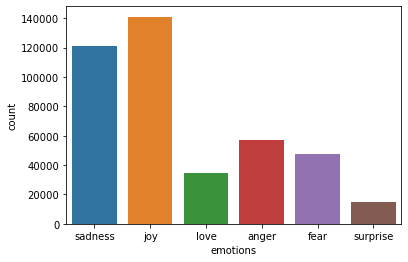

In [12]:
sns.countplot(x=new_df['emotions'])

In [13]:
new_df['emotions'].value_counts()

joy         141067
sadness     121187
anger        57317
fear         47712
love         34554
surprise     14972
Name: emotions, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

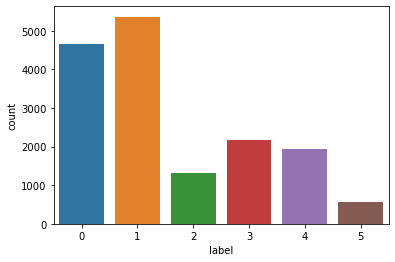

In [14]:
sns.countplot(x=train_df['label'])

In [6]:
train_df = pd.read_csv("data/training.csv")
test_df = pd.read_csv("data/test.csv")
old_df = pd.concat([train_df, test_df])

old_df.label.value_counts()

value_counts_inverse = []
for value in old_df.label.value_counts().values:
    value_counts_inverse.append(10_000 - value)
    
value_counts_inverse

[3943, 4753, 7566, 7839, 8537, 9362]

<AxesSubplot:xlabel='emotions', ylabel='count'>

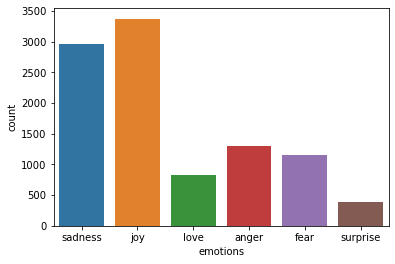

In [15]:
new_df_10_000 = new_df[:10000]
sns.countplot(x=new_df_10_000['emotions'])

In [16]:
new_df['text'][0]

'i feel awful about it too because it s my job to get him in a position to succeed and it just didn t happen here'

# Victor's changes


<AxesSubplot:xlabel='emotions', ylabel='count'>

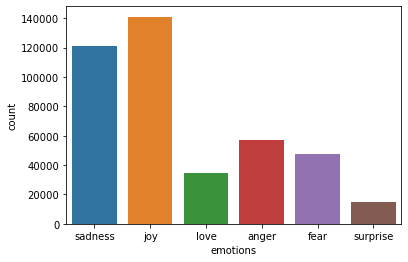

In [17]:
sns.countplot(x=new_df['emotions'])

In [18]:
#Made a copy of the data frame
new_df_10000_2 = new_df.copy()

<AxesSubplot:xlabel='emotions', ylabel='count'>

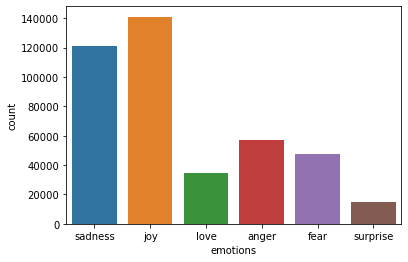

In [19]:
sns.countplot(x=new_df_10000_2['emotions'])

In [20]:
new_df_10000_2.head().reset_index()

,index,text,emotions
0,0,i feel awful about it too because it s my job ...,sadness
1,1,im alone i feel awful,sadness
2,2,ive probably mentioned this before but i reall...,joy
3,3,i was feeling a little low few days back,sadness
4,4,i beleive that i am much more sensitive to oth...,love


# Cutting the data to have all the same amount of samples

In [22]:
#Getting 10k Sadness
sadness_df = new_df_10000_2[new_df_10000_2['emotions'] == 'sadness']
sadness_df_10000 = sadness_df.iloc[:10000]
print(sadness_df_10000.shape)
print(sadness_df_10000.head())

#Getting 10k Joy
joy_df = new_df_10000_2[new_df_10000_2['emotions'] == 'joy']
joy_df_10000 = joy_df.iloc[:10000]
print(joy_df_10000.shape)
print(joy_df_10000.head())

#Getting 10k Love
love_df = new_df_10000_2[new_df_10000_2['emotions'] == 'love']
love_df_10000 = love_df.iloc[:10000]
print(love_df_10000.shape)
print(love_df_10000.head())

#Getting 10k Anger
anger_df = new_df_10000_2[new_df_10000_2['emotions'] == 'anger']
anger_df_10000 = anger_df.iloc[:10000]
print(anger_df_10000.shape)
print(anger_df_10000.head())

#Getting 10k Fear
fear_df = new_df_10000_2[new_df_10000_2['emotions'] == 'fear']
fear_df_10000 = fear_df.iloc[:10000]
print(fear_df_10000.shape)
print(fear_df_10000.head())

#Getting 10k Surprise
surprise_df = new_df_10000_2[new_df_10000_2['emotions'] == 'surprise']
surprise_df_10000 = surprise_df.iloc[:10000]
print(surprise_df_10000.shape)
print(surprise_df_10000.head())

(10000, 2)
                                                 text emotions
0   i feel awful about it too because it s my job ...  sadness
1                               im alone i feel awful  sadness
3            i was feeling a little low few days back  sadness
11  i also feel disillusioned that someone who cla...  sadness
16  i wish you knew every word i write i write for...  sadness
(10000, 2)
                                                 text emotions
2   ive probably mentioned this before but i reall...      joy
6   i am one of those people who feels like going ...      joy
7   i feel especially pleased about this as this h...      joy
8   i was struggling with these awful feelings and...      joy
12  i mean is on this stupid trip of making the gr...      joy
(10000, 2)
                                                 text emotions
4   i beleive that i am much more sensitive to oth...     love
5   i find myself frustrated with christians becau...     love
19  i feel blessed eve

<AxesSubplot:xlabel='emotions', ylabel='count'>

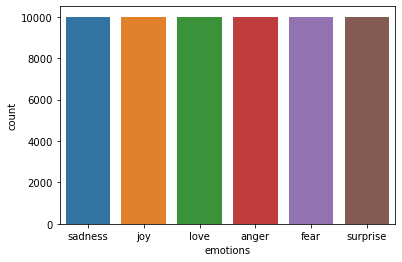

In [24]:
#Concated all the serparted data frames of all the emotions and but them back together
all_10k_df = pd.concat([sadness_df_10000, joy_df_10000, love_df_10000, anger_df_10000, fear_df_10000, surprise_df_10000])
sns.countplot(x=all_10k_df['emotions'])

In [25]:
all_10k_df.shape

(60000, 2)

In [27]:
all_10k_df['cleaned_text'] = all_10k_df['text'].apply(clean_tweets_without_nlp)
print("Original text: ", all_10k_df['text'][0])
print("Cleaned test: ", all_10k_df['cleaned_text'][0])

Original text:  i feel awful about it too because it s my job to get him in a position to succeed and it just didn t happen here
Cleaned test:  i feel awful about it too because it s my job to get him in a position to succeed and it just didn t happen here


C:\Users\vicwu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


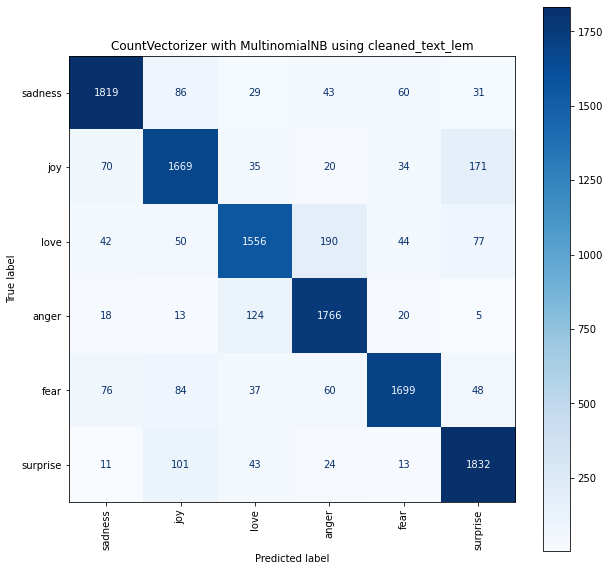

              precision    recall  f1-score   support

       anger       0.89      0.88      0.89      2068
        fear       0.83      0.83      0.83      1999
         joy       0.85      0.79      0.82      1959
        love       0.84      0.91      0.87      1946
     sadness       0.91      0.85      0.88      2004
    surprise       0.85      0.91      0.87      2024

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



In [29]:
X = all_10k_df['cleaned_text'].values
y = all_10k_df['emotions'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

X_train_text = X_train
X_test_text = X_test



#Fit and Transform
BoW_vectorizer = CountVectorizer()
BoW_vectorizer.fit(X_train)

X_train = BoW_vectorizer.transform(X_train)
X_test = BoW_vectorizer.transform(X_test)

#Create model and predict
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Create confusion matrix for BOW model
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, X_test, y_test, display_labels=['sadness','joy','love','anger','fear','surprise'], cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
plt.title(f'CountVectorizer with MultinomialNB using {col}')
plt.show()

#display metrics
print(classification_report(y_test, model.predict(X_test)))